In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score, roc_curve, roc_auc_score, confusion_matrix
import xgboost 
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import modelEvalUtils as meu
%matplotlib inline
sns.set()

In [67]:
df = pd.read_csv("genetic_EDA_st.csv")
df = df.drop(["Unnamed: 0"], axis = 1)

In [68]:
df

,AF_ESP,LoFtool,CADD_PHRED,2KB_upstream_variant,3_prime_UTR_variant,500B_downstream_variant,5_prime_UTR_variant,frameshift_variant,intron_variant,missense_variant,...,RYR2,SCN5A,SMARCA4,STK11,SYNE1,TP53,TSC2,TTN,other-gene,CLASS
0,-0.252343,-0.676789,-1.437014,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
1,2.364400,-0.676789,0.662147,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
2,-0.252343,-0.676789,-0.408216,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,1
3,-0.175026,-0.898177,0.579387,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
4,-0.219698,-0.898177,0.947209,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59387,0.010534,-0.951919,-0.400859,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,-1.035378,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
59388,1.123896,-0.951919,-1.443175,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,-1.035378,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0
59389,-0.217980,-0.951919,-1.452646,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,0.965831,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,1
59390,-0.037574,-0.951919,-0.271202,-0.086095,-0.110231,-0.023933,-0.186966,-0.139141,-0.492506,-1.035378,...,-0.073369,-0.070893,-0.086492,-0.076438,-0.084392,-0.083477,-0.103211,-0.218783,0.796767,0


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("CLASS", axis =1), 
                                                    df.CLASS,
                                                   test_size =0.3,
                                                   random_state = 41)

In [70]:
model_names = ["xgb", "logit", "knn", "rf"]
for model_name in model_names:
    with open(f"{model_name}.pickle", "rb") as file:
        exec(f"{model_name} = pickle.load(file)")

In [71]:
model_vars = [eval(n) for n in model_names]


In [72]:

model_vars = [eval(n) for n in model_names]
plot_vars = [meu.makeROCPlot(X_test, Y_test, eval(n), plot=False) for n in model_names]

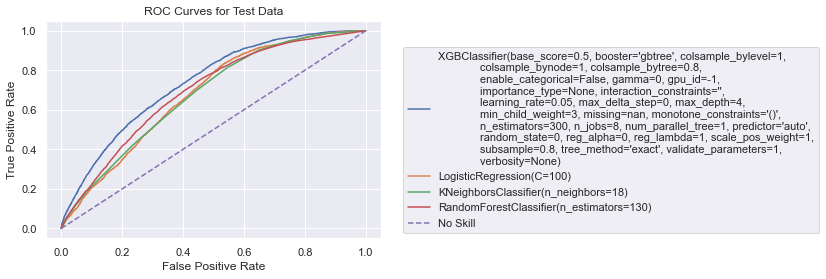

In [46]:
meu.makeCombinedROC(plot_vars, model_vars)

In [47]:
model_vars = [eval(n) for n in model_names]
plot_vars = [meu.makeScorePlot(X_test, Y_test, eval(n), plot=False) for n in model_names]

/Users/chioun/Desktop/metis_data_camp/Classification/modelEvalUtils.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/chioun/Desktop/metis_data_camp/Classification/modelEvalUtils.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/chioun/Desktop/metis_data_camp/Classification/modelEvalUtils.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/chioun/Desktop/metis_data_camp/Classification/modelEvalUtils.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


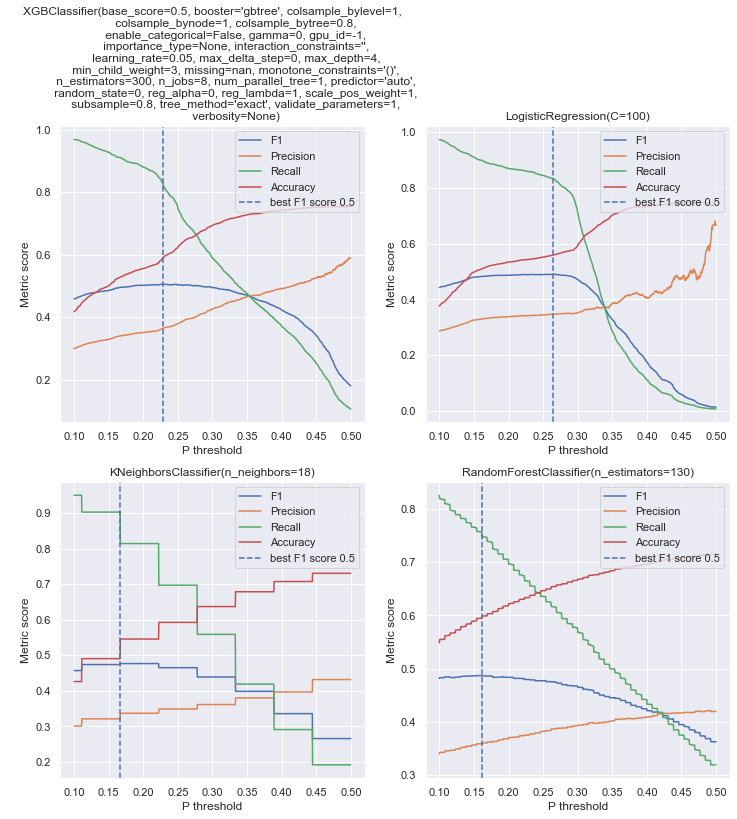

In [37]:
meu.makeCombinedScore(plot_vars, model_vars)

In [74]:
precision_score(Y_test, xgb.predict(X_test))

0.5890243902439024

In [75]:
precision_score(Y_train, xgb.predict(X_train))

0.6458907887479316

In [76]:
f1_score(Y_test, xgb.predict(X_test))

0.18056074766355137

In [77]:
f1_score(Y_train, xgb.predict(X_train))

0.19042198552727865

In [78]:
recall_score(Y_test, xgb.predict(X_test))

0.10662251655629139

In [79]:
recall_score(Y_train, xgb.predict(X_train))

0.11167270646576388

In [80]:
accuracy_score(Y_train, xgb.predict(X_train))

0.7604993505556358

In [81]:
accuracy_score(Y_test, xgb.predict(X_test))

0.7539566730272758